In [17]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import scipy.io as sio
from dataclasses import dataclass
from typing import List, Tuple
import os
from dotenv import load_dotenv
load_dotenv()
import tidy3d as td
from tidy3d import web
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import AutomationModule as AM
from scipy.optimize import curve_fit
from natsort import natsorted


tidy3dAPI = os.environ["API_TIDY3D_KEY"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
Db = lambda l:3e2*l/3
a=5/3
l = np.array([1.12]) #fitted value 
z0 = 3.25
nu = 0.43


#Let's calculate  adjusted values
k =  2*np.pi*(nu/(1))

kl = k*l/4.1
l_adjusted = kl/k
Db1 = Db(l_adjusted)
adjusted_xi = 6*l_adjusted*(k*l_adjusted)**2/(1-(k*l_adjusted)**4)

In [24]:
adjusted_xi

array([1.26944829])

In [19]:
slices = np.array([0.15,0.3,0.5,0.7])

In [20]:
#Anderson
def alpha_star(Db,xi,L):
    return (Db/xi**2)*np.exp(-L/xi)

def trans_t(t,alpha,z0,L,D,td=1,p=0.5,s=0.85): 
    
    A = ((L+2*z0)**2/np.pi**2)
   

    B = (alpha*td)**(s+1)*np.exp(-alpha*t+1)*(t*alpha)**-(p+1)

    return B**(D*td/A)

In [21]:
#store fluxes and max times for SAL regime 

max_times = []
fluxes_SAL = []
fluxes_Diff = []

for k,path_direction in enumerate( [
                       "RCP Sample 1 T_t No Structure/z_incidence",
                       ]):

      folder_path = f"data/{path_direction}"

      
      for i,filename in enumerate(natsorted(os.listdir(folder_path))):
            print(filename)
            
            if not Path(filename).suffix==".txt":
                  continue
            
            
            
            if os.path.isfile(os.path.join(folder_path, filename)):
                file=os.path.join(folder_path, filename)
                structure_1 = AM.loadFromFile(key = tidy3dAPI, file_path=file)
                sim_data, sim_data0 = structure_1.sim_data, structure_1.sim_data0
                flux_t = sim_data["time_monitorT"].flux
                flux_index = np.argmax(flux_t.values)
               
                x,y = flux_t['t'][:]*1e12,((flux_t[:]/np.max(flux_t)))

                item_flux = {
                        "flux":np.array(y),
                        "times":np.array(x),
                        "max_time":flux_t['t'][flux_index]*1e12,
                        "size":slices[i]
                }
                if k==0:
                  
                  fluxes_SAL+=[item_flux]
                  if i==3:
                        flux_t0 = sim_data0["time_monitorT"].flux
                        x0,y0 = flux_t0['t'][:]*1e12,((flux_t0[:]/np.max(flux_t0)))
                        flux_index0 = np.argmax(flux_t0.values)
                        item_flux_0 = {
                          "flux":np.array(y0),
                          "times":np.array(x0),
                          "max_time":flux_t0['t'][flux_index0]*1e12,
                          "size":0
                          }
                        fluxes_SAL = [item_flux_0] + fluxes_SAL
                else:
                  
                  fluxes_Diff+=[item_flux]
                  if i==3:
                      flux_t0 = sim_data0["time_monitorT"].flux
                      x0,y0 = flux_t0['t'][:]*1e12,((flux_t0[:]/np.max(flux_t0)))
                      flux_index0 = np.argmax(flux_t0.values)
                      item_flux_0 = {
                        "flux":np.array(y0),
                        "times":np.array(x0),
                        "max_time":flux_t0['t'][flux_index0]*1e12,
                        "size":0
                        }
                      fluxes_Diff = [item_flux_0] + fluxes_Diff
                      
      
            

01_Sample_600_res_L18.01_28ff_eps_eps_12.960000038146973_size_30_runtime_6_lambdaRange_4.01-3.98_incidence.txt
Configured successfully.
output/data/RCP Sample 1 T_t No Structure/z_incidence\01_Sample_600_res_L18.01_28ff_eps_eps_12.960000038146973_size_30_runtime_6_lambdaRange_4.01-3.98_incidence.txt/Data
01_Sample_600_res_L18.01_28ff_eps_eps_12.960000038146973_size_30_runtime_6_lambdaRange_4.86-4.83_incidence.txt
Configured successfully.
output/data/RCP Sample 1 T_t No Structure/z_incidence\01_Sample_600_res_L18.01_28ff_eps_eps_12.960000038146973_size_30_runtime_6_lambdaRange_4.86-4.83_incidence.txt/Data


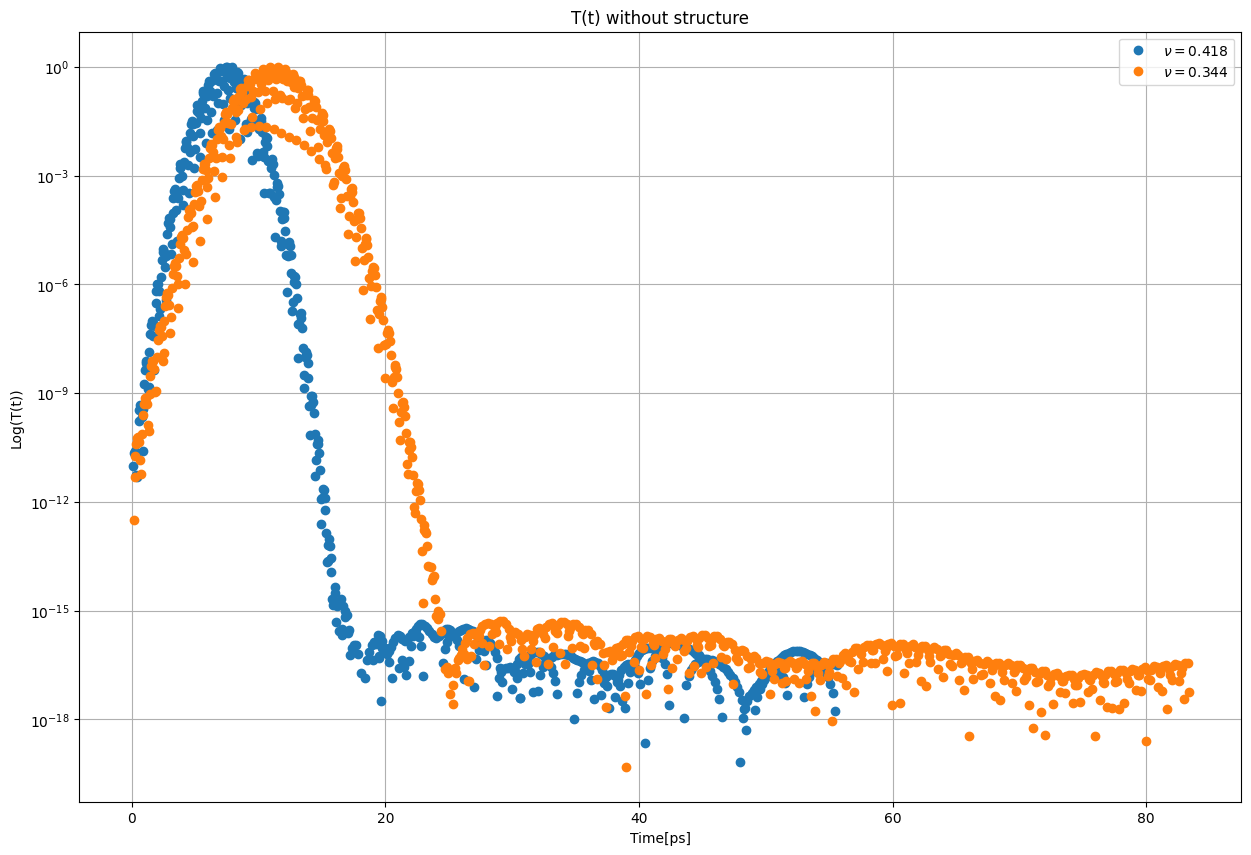

In [23]:
plt.figure(figsize=(15, 10))
plt.plot(fluxes_SAL[0]['times'],fluxes_SAL[0]["flux"],"o",label=r"$\nu=0.418$")
plt.plot(fluxes_SAL[1]['times'],fluxes_SAL[1]["flux"],"o",label=r"$\nu=0.344$")
plt.title(f"T(t) without structure")
plt.ylabel("Log(T(t))")
plt.xlabel("Time[ps]")
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()
          
               








In [ ]:



      
# for i,filename in enumerate(natsorted(os.listdir(folder_path))):
#       print(filename)
      
#       if not Path(filename).suffix==".txt":
#             continue
      
      
      
#       if os.path.isfile(os.path.join(folder_path, filename)):
#           plt.figure(figsize=(15, 10))
#           file=os.path.join(folder_path, filename)
#           structure_1 = AM.loadFromFile(key = tidy3dAPI, file_path=file)
#           sim_data, sim_data0 = structure_1.sim_data, structure_1.sim_data0
#           flux_t = sim_data["time_monitorT"].flux
#           flux_index = np.argmax(flux_t.values)
         
#           x,y = flux_t['t'][flux_index:]*1e12,((flux_t[flux_index:]/np.max(flux_t)))
#           L = 18.01*slices[i]
#           max_times +=[flux_t['t'][flux_index]*1e12]
#           alpha = alpha_star(Db1,adjusted_xi,18.01*slices[i])
#           #transmission_anderson = [trans_t(t,alpha,z0,18.01*slices[i],Db1,max_times[i]) for t in x]
#           #transmission_diffusive = (np.exp(-(x)*(Db1)*(np.pi**2)/(L + 2*z0)**2))
#           plt.plot(x,y,"o",label=f"Simulation - {max_times[i].values}")
#       #     plt.plot(x,(transmission_anderson/np.max(transmission_anderson)), label=f"Anderson Theory")
#       #     plt.plot(x,(transmission_diffusive/np.max(transmission_diffusive)), label=f"Diffusive"
#           plt.title(f"L={slices[i]:.3g}")
#           plt.ylabel("Log(T(t))")
#           plt.xlabel("Time[ps]")
#           plt.yscale("log")
#           plt.legend()
#           plt.grid()
#           #plt.savefig(f'output/anderson/Flux Time log Near Gap.pdf', format='pdf')
#           plt.show()
          
               








In [25]:
18*100**(1/3)

83.54859900503001

In [28]:
np.sqrt(200/np.pi)*2

np.float64(15.957691216057308)